In [7]:
import logging
import sys
import MySQLdb
import dbconn2
import csv
import math
import itertools
from datetime import datetime, timedelta,date
import dateparser
import decimal     # some MySQL types are returned as type decimal
from dbi import get_dsn, get_conn # connect to the database
import date_ui
import numpy as np
import json
from typing import Optional
import pandas as pd
import argparse

import plotly.express as px


In [21]:
def get_clean_isfs(curs) -> list:
    ''' Returns all 2hr Clean ISFs '''
    curs.execute('''SELECT rtime, isf from clean_regions_2hr_new;''')
    clean_isfs = curs.fetchall()
    return clean_isfs
    
def get_clean_isfs_df(curs) -> pd.DataFrame: 
    ''' Returns a dataframe of all 2hr Clean ISFs'''
    clean_isfs = get_clean_isfs(curs)
   
    # convert lst_of_tuples to lst_of_lst
    clean_isfs = [list(tple) for tple in clean_isfs]
    df = pd.DataFrame(clean_isfs, columns = ["rtime", "isf"])
    df["rtime"] = pd.to_datetime(df["rtime"])
    df["hour"] = df["rtime"].apply(lambda x: x.hour)
    df["year"] = df["rtime"].apply(lambda x: x.year)
    df["bucket"] = df["hour"].apply(lambda x: x // 2)
    
    return(df)

In [22]:
conn = get_conn()
curs = conn.cursor()
df = get_clean_isfs_df(curs)
df

,rtime,isf,hour,year,bucket
0,2014-03-17 01:25:00,4.285710,1,2014,0
1,2014-03-26 19:10:00,0.740741,19,2014,9
2,2014-03-30 16:55:00,123.478000,16,2014,8
3,2014-04-06 06:05:00,98.750000,6,2014,3
4,2014-04-09 05:40:00,113.571000,5,2014,2
...,...,...,...,...,...
3815,2024-07-23 23:15:00,9.629630,23,2024,11
3816,2024-07-24 06:25:00,47.857100,6,2024,3
3817,2024-07-26 23:05:00,36.666700,23,2024,11
3818,2024-07-27 05:45:00,8.750000,5,2024,2


In [32]:
df[["year", "bucket", "isf"]].groupby(by = ["year", "bucket"]).mean()
df[["year", "bucket", "isf"]].groupby(by = ["year", "bucket"]).median()
df[["year", "bucket", "isf"]].groupby(by = ["year", "bucket"]).std()

isf
year bucket           
2014 0       56.653086
     1       54.579142
     2       67.273142
     3       84.991857
     4       78.451040
...                ...
2024 7       15.766075
     8       11.870840
     9       32.582761
     10      16.282310
     11      14.097412

[129 rows x 1 columns]

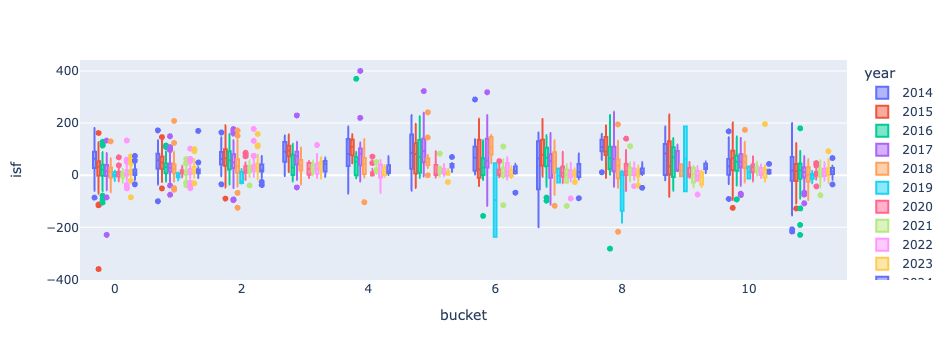

In [38]:
fig = px.box(df, x = "bucket", color = "year", y = "isf")
fig.show()